# Assignment 3
This assignment covers material on fitting data and solving ODEs.

The breakdown of the marks is as follows:

Q0: [1 mark]  
Q1: [7 marks]  
Q2: [4 marks]  
Q3: [4 marks]  
Q4: [4 marks]  
Q5: [10 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

## Question 1: Linear least-square fitting
This questions asks you to write a function to find the best linear fit to a dataset and then apply that function to a few data sets. As always when testing a new piece of code, you should first test the code on a small data set for which you know the result. The other advantage of testing with a small dataset is that you can manually check each step of the calculation if you need to debug the code.

The normal equations for linear least-squares fitting are given by:  
  
$$
  \begin{align*}
    m \sum x_i^2 + c \sum x_i &= \sum x_i y_i \\
    m \sum x_i + cn &= \sum y_i
  \end{align*}
$$
  
Write these simultaneous equations in matrix for $A.x = b$, where $A$ is a $2\times2$ matrix and $x=\{m,c\}$ and $b$ are column vectors. Note that for a $2\times2$ matrix 
$$
A = \begin{pmatrix}
    a  & b \\
    c  & d 
\end{pmatrix}
$$
the inverse is given by
$$
A^{-1} = \frac{1}{ad-bc}\begin{pmatrix}
    d  & -b \\
    -c  & a 
\end{pmatrix}
$$

### Q1a.

Write a function that takes in two arrays of data for the x and y values and returns the values of $m$ and $c$ from for the linear least squares fit. Call the function `LinearLeastSquares`. You might want to use the function `np.dot(A,b)` which will take the dot product of a matrix, $A$ and a vector, $b$.

In [3]:
# n is the number of elements
def LinearLeastSquares(data):
    #Assigning all values to 0 at the start
    a = b = v1 = v2 = 0
    x = data[:,0]
    y = data[:,1]
    for num in x:
        a += num**2
    for nu in x:
        b += nu
    c=b
    d=len(data)
    v1=np.dot(x,y)
    for n in y:
        v2+=n
    inverse=np.array([[d, -b],[-c, a]])
    vector=np.array([[v1],[v2]])

    return (1/((a*d)-(b*c)))*np.dot(inverse,vector)

Test you function with the data we looked at in the lecture, given below:

In [4]:
testdata  = np.array([[20.5, 765], [32.7, 826], [51.0, 873], [73.2,942], [95.7,1032]])

You should get the result $m=3.394872522996579$ and $c=702.1720627939267$. Explicitly print these values out.

In [5]:
#testing the function on testdata
mcvalue = LinearLeastSquares(testdata)

m = mcvalue[0]
c = mcvalue[1]

print(m)
print(c)
#Values match up with what is given

[3.39487252]
[702.17206279]


### Q1b
Plot the data, using `plt.scatter(xi, yi)`, and the best fit curve over the full range of the data. Add a legend to the plot that labels the data and line with its equation.

Text(0.5, 1.0, 'TestData')

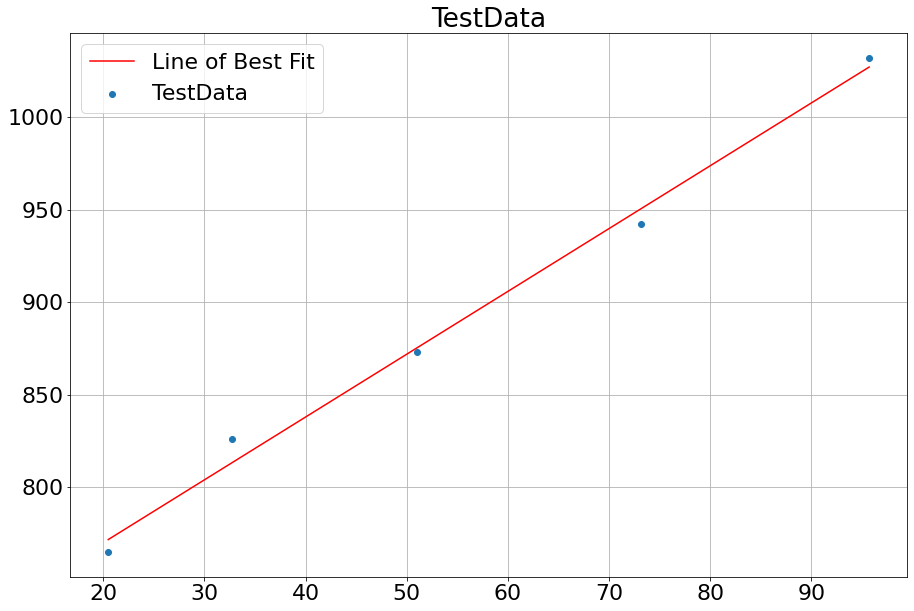

In [233]:
#defiing rows and columns into xi and yi
xi = testdata[:,0]
yi = testdata[:,1]

plt.scatter(xi,yi)
#plotting y as mxi+c as y=mxi+c as the line of best fit
plt.plot(xi,m*xi+c, color='red')
plt.legend(['Line of Best Fit','TestData'])
plt.grid(True)
plt.title('TestData')


### Q1c
Load the data in `FitData1.dat` and fit the data using your `LinearLeastSquares` function. Print out the value of $m$ and $c$ to 5 decimal places, and plot the data and the fit.

In [234]:
fitdata1 = np.loadtxt("FitData1.dat")
LLS1 = LinearLeastSquares(fitdata1)

m1 = LLS1[0]
c1 = LLS1[1]

#Aslo getting the values to 5 decimal places
print("The value of m is = %.5f "%m1)
print("The value of c is = %.5f "%c1)

The value of m is = -2.96255 
The value of c is = 1.20807 


Text(0.5, 1.0, 'FitData1')

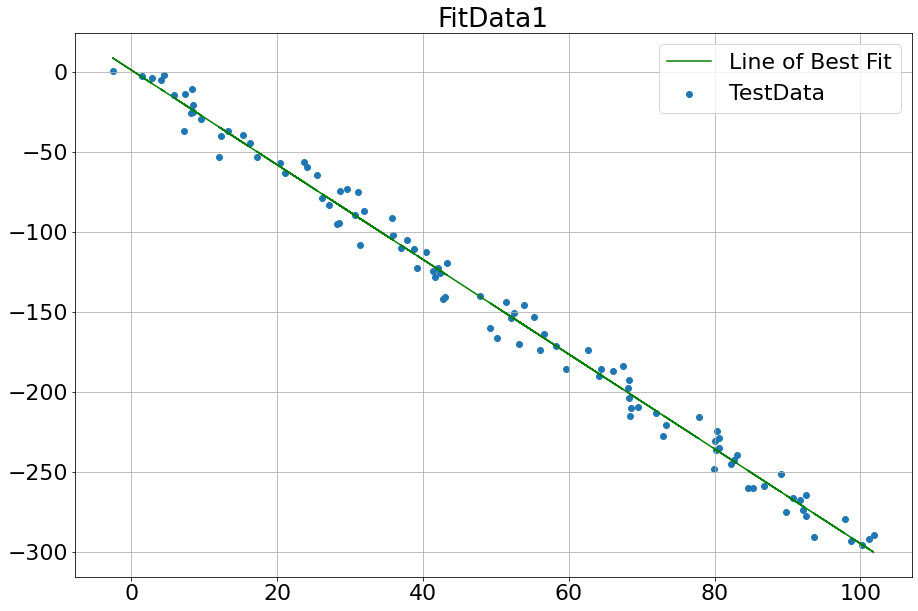

In [235]:
#Same as Q above
x1 = fitdata1[:,0]
y1 = fitdata1[:,1]

plt.scatter(x1,y1)
#I assigned colour green so line of best fit would be easier to see
plt.plot(x1,m1*x1+c1, color='green')
plt.legend(['Line of Best Fit','TestData'])
plt.grid(True)
plt.title('FitData1')

### Q1d
Load the data in `FitData2.dat`. Determine whether this data is (approximately) power law or exponential. Depending on the answer, fit either the log or log-log of the data using your `LinearLeastSquares` function. Print the values of $m$ and $c$, and plot the (log or log-log of the) data and the fit. State explicitly what the approximate behaviour of the data is.

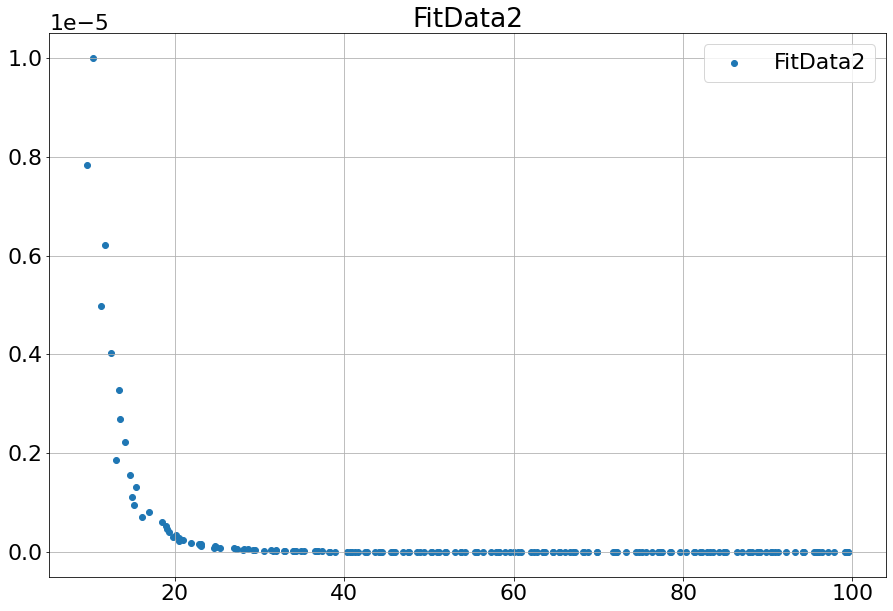

In [259]:
fitdata2 = np.loadtxt("FitData2.dat")

x2 = fitdata2[:,0]
y2 = fitdata2[:,1]

plt.scatter(x2,y2)
plt.legend(['FitData2'])
plt.title('FitData2')
plt.grid(True)
#As we can see Data plotted normally below is an expotential

The value of m is = -5.00890 
The value of c is = 0.03190 


Text(0.5, 1.0, 'FitData2 Log-Log Graph')

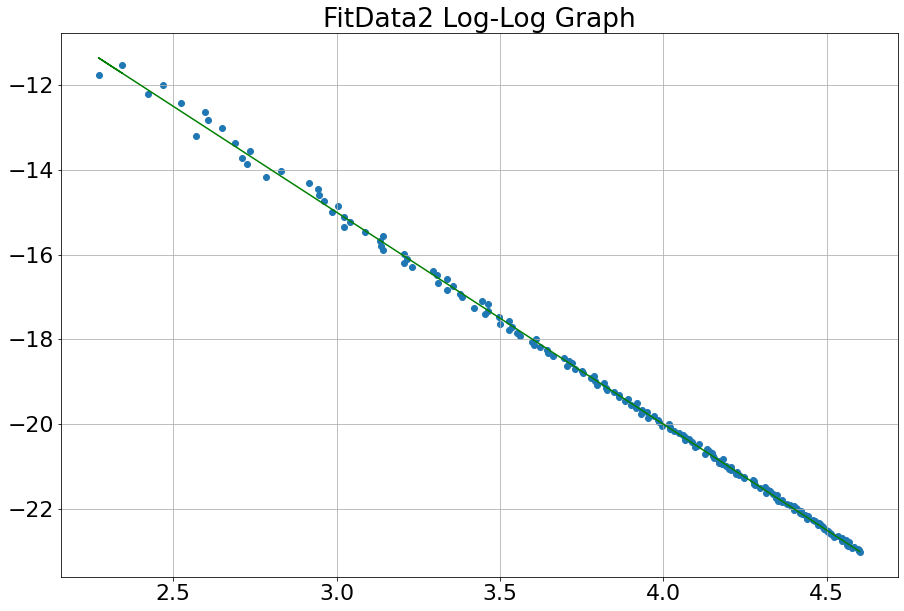

In [258]:
# Getting log of data so line of best fit for values m and c are both also logs
LLS2 = LinearLeastSquares(np.log(fitdata2))

m2 = LLS2[0]
c2 = LLS2[1]

print("The value of m is = %.5f "%m2)
print("The value of c is = %.5f "%c2)

#Now plotting the log-log of the data fit so that we can see a linear relationship
plt.scatter(np.log(x2),np.log(y2))
plt.plot(np.log(x2),m2*np.log(x2)+c2, color='green')
plt.grid(True)
plt.title('FitData2 Log-Log Graph')

### As we can see above this is approximately the behaviour of the power law ($x^n$) function as it looks straight on a log-log plot. This curve is the log-log plot as we can see the log cancels out the exponential makes a straight line plot.

Now:
- commit the notebook to your local repository
- push the changes to the GitHub

## Question 2: second-order ODEs

Use the below second-order version of the (fixed-step) RK2 function for this question.

In [11]:
def RK2(f, dx, x0, y0, imax):
    output = np.empty((imax, 3))
    i = 0
    xi = x0
    yi = y0
    while(i < imax):
        k1 = dx*f(xi, yi)
        k2 = dx*f(xi + dx, yi + k1)
        yi = yi + 0.5*(k1 + k2)
        xi += dx
        output[i, 0] = xi
        output[i, 1] = yi[0]
        output[i, 2] = yi[1]
        i += 1
    return output

### Q2a

Write the follow ODEs in first-order form and then solve them using the `RK2` function. Plot the numerical and analytic solution on the same plot (with a grid, labelling the axes and a legend).

$$
 y''(x) - y'(x) +\frac{1}{4} y(x) = -\sin(x)
$$
with $y(0) = 0, y'(0) = 73/100$. Find the numerical solution between $x=0$ and $x=9$.

This has the analytic solution:

$$
y(x) = \frac{1}{100} \left(-7 e^{x/2} x+64 e^{x/2}+48 \sin (x)-64 \cos (x)\right)
$$

For the numerical solution, start with a step size of $\Delta x = 0.1$. You may need to adjust this to get the numerical solution to agree with the analytic solution.

In [12]:
#First wwriting the ODE in first irder format
def fode(x,y):
    return np.array([y[1],y[1]-(1/4)*y[0]-np.sin(x)])

Text(0.5, 1.0, 'RK2 Function')

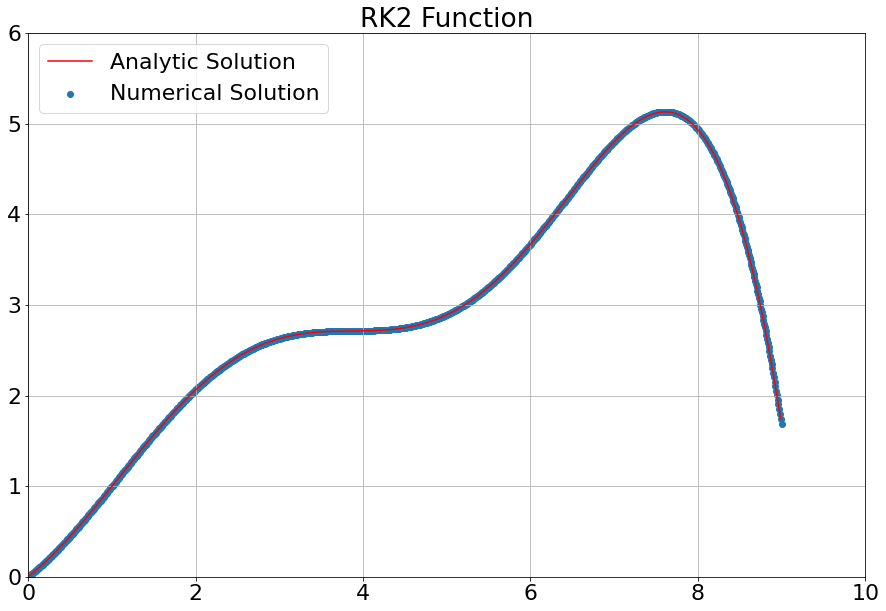

In [241]:
solv = RK2(fode, .009, 0, [0,73/100], 1000)
plt.scatter(solv[:,0],solv[:,1])
xan=np.arange(0,9,.01)
yan= (1/100)*(-7*np.exp(xan/2)*xan+64*np.exp(xan/2)+48*np.sin(xan)-64*np.cos(xan))
plt.plot(xan,yan, color='red')
plt.xlim(0,10)
plt.ylim(0,6)
plt.grid(True)
plt.legend(['Analytic Solution','Numerical Solution'])
plt.title('RK2 Function')

How small do you have to make the step size for the numerical solution to agree well with the analytic solution? What does this suggest about the equation?

### You have to make the step size smaller than .01 to about .009 in order for the function to be graphed out. This suggests that for both graphs to agree (analytic and numeric) the step size needs to be less than .01

### Q2b

Write the follow ODEs in first-order form and then solve them using the `RK2` function. 

$$y''(x) + x y'(x) - 3\sin(x) y(x) = 0 $$

with $y(0) = 0, y'(0) = 1$

Plot the numerical solution (with a grid and labelling the axes) from $x=0\dots20$ with step size $\Delta x = 0.1$. There is no analytic solution to compare the solution against.

In [14]:
#Writing in first order format
def fode1(x,y):
    return np.array([y[1],-x*y[1]+3*np.sin(x)*y[0]])

Text(0.5, 1.0, 'Q2b')

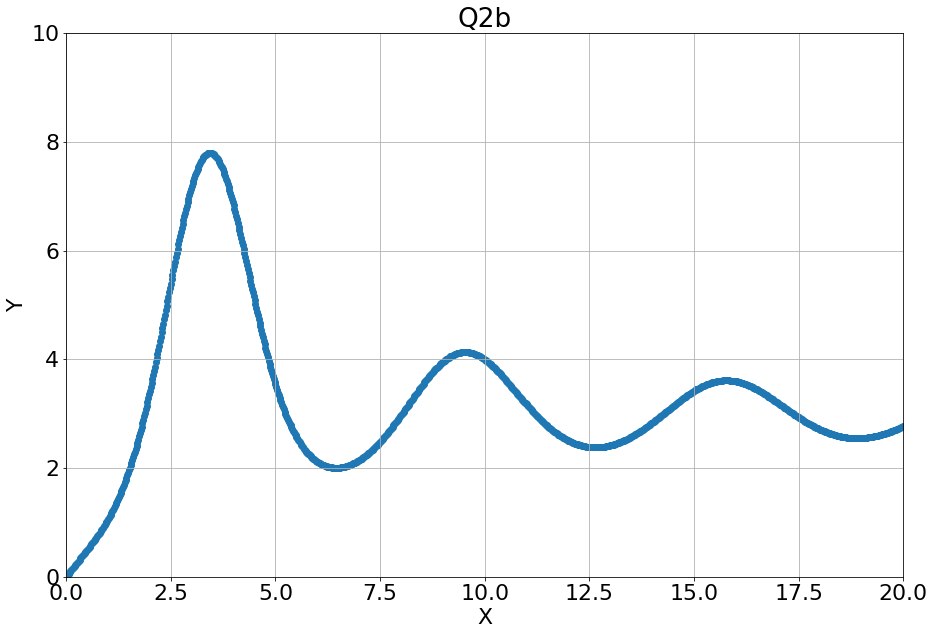

In [245]:
solv1 = RK2(fode1, .02, 0, [0,1], 1000)
plt.scatter(solv1[:,0],solv1[:,1])
plt.xlim(0,20)
plt.ylim(0,10)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.title('Q2b')

Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

## Question 3: equilbrium points

Using `solve_ivp` solve the non-linear first-order equation:

$$u'(x) = u(x)[2-u(x)]$$

Find and plot the solution between $x=0$ and $x=8$ for the following 8 initial values: $u(0) = \{0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5\}$. Draw a grid on the plot and label your axes.

You should find the systems with initial values $u(0) = \{0,2\}$ do not evolve as the right-hand side equals zero in these cases. These two values are called *equilibrium points*. You should observe that systems with $u(0) > 0$ should tend towards $u=2$ (and away from $u=0$) for large $x$. For this reason we say that $u=2$ is a stable equilbrium and $u=0$ is an unstable equilbrium.

In [16]:
def dg(t,y):
    return y*(2-y)

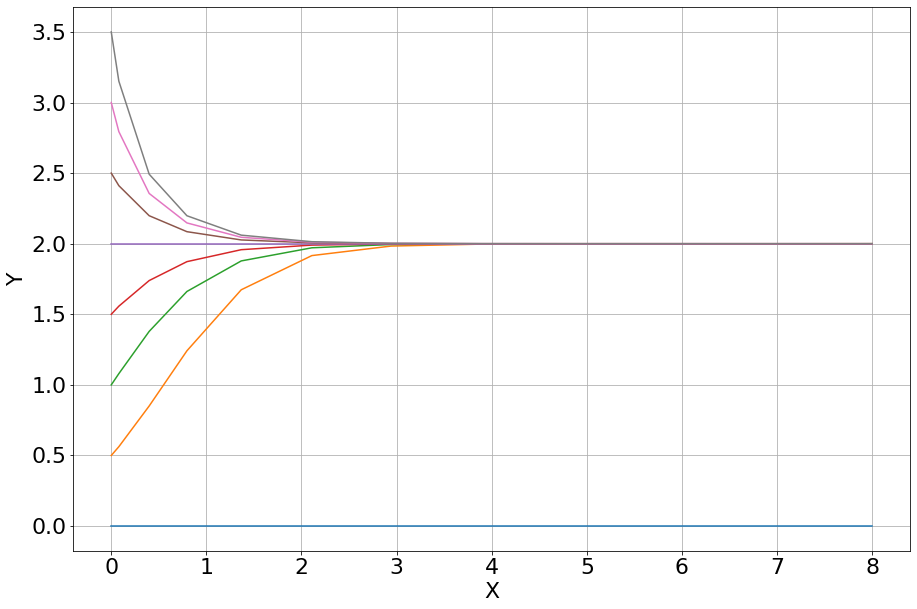

In [255]:
solu = solve_ivp(dg, [0,8], [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])

plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(solu.t, solu.y[0])
plt.plot(solu.t, solu.y[1])
plt.plot(solu.t, solu.y[2])
plt.plot(solu.t, solu.y[3])
plt.plot(solu.t, solu.y[4])
plt.plot(solu.t, solu.y[5])
plt.plot(solu.t, solu.y[6])
plt.plot(solu.t, solu.y[7])

#We see here that all curves tend towards y = 2 except y = 0

Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

## Question 4: implicit methods

Write a function to solve the following first-order ODE using the backwards Euler method:

$$
y'(x) = -y(x) + x
$$
with $y(0) = 1$

This has the analytic solution
$$
 y(x) = -1 + 2e^{-x} + x
$$

Plot the numerical and analytics solutions. Show a grid, label your axes and show a legend.

In [18]:
def BackwardEulerMethod(dx, x0, y0, imax, plotSteps=True):
    xi = x0
    yi = y0
    steps = np.zeros((imax+1,2))
    steps[0,0] = x0
    steps[0,1] = y0
    i = 0
    while i < imax:
        #Changing formula in order for it to work for our specific ODE
        yi = (yi + dx*(xi))/(1+ dx)
        xi += dx
        i += 1
        steps[i, 0] = xi
        steps[i, 1] = yi  
    return steps

In [19]:
#Defining our analytic solution
def yy(x):
    return -1+2*np.exp(-x)+x

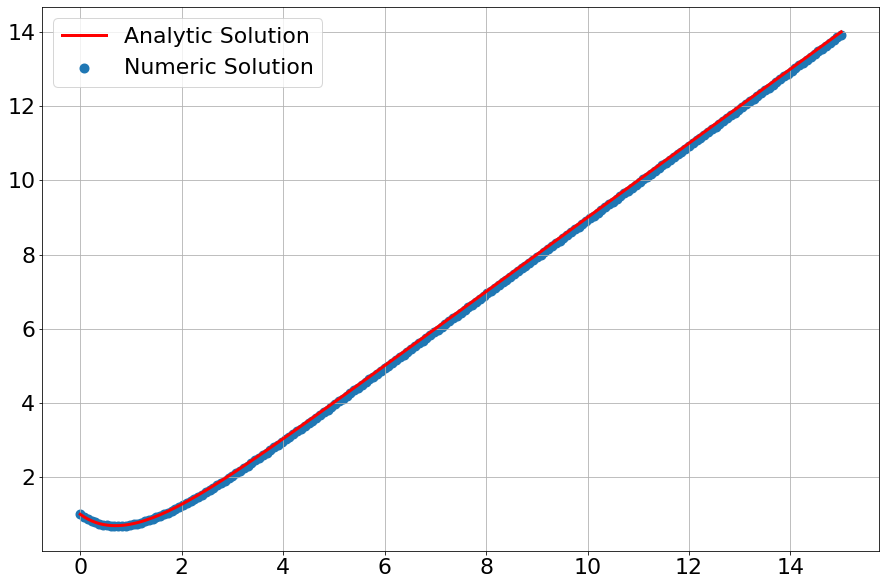

In [257]:
grapstep= BackwardEulerMethod(.075, 0, 1, 200, plotSteps=True)

x3=grapstep[:,0]
y3=grapstep[:,1]

plt.scatter(x3,y3, linewidth=4)

xE = np.linspace(0,15,200)
yE = yy(xE)

#Making it red so analytic solution easier to see
plt.plot(xE, yE, color='red', linewidth=3)
plt.grid(True)
plt.legend(['Analytic Solution','Numeric Solution'])


Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

## Question 5: solving boundary value problems (BVPs) via a shooting method

This question is harder than the earlier ones. Do not attempt it until you are happy with your answers to the previous questions.

As a reminder, the shooting method is a numerical method for solving Boundary Value Problems (BVP) of the form

$$y''(x)=f(x,y,y'),\;\;\;a<x<b$$

$$y(a)=y_a,\;\;\; y(b)=y_b$$

Consider now the Initial Value Problem (IVP)

$$y''(x)=f(x,y,y'),\;\;\;a<x<b$$

$$y(a)=y_a,\;\;\; y'(a)=\gamma$$

and denote its solution by $y_{\gamma}(x)$.


The shooting method looks for a root of the function

$$F(\gamma)=y_{\gamma}(b)-y_b,$$

that is, which value of $\gamma$ yields $y_{\gamma}(b)=y_b$. This method combines differential equation solving and root finding methods.

We will develop the algorithm as follows:

1. Write an efficient root finder
2. Define the function $F(\gamma)$ above
3. Find the root of $F(\gamma)$ which will solve our BVP
4. Package the whole algorithm up into a single function

We will check that each step is working along the way and use this algorithm to solve the following BVP:

$$w''(t) = \frac{3}{2}w(t)^2$$

with $w(0) = 4, w(1) = 1$

### Q5a. Write an efficient root finder

Write a function with signature ``FindRootSecant(f, x0, x1, tol)`` that implements the secant root finding method. You **must** write the function so that it only evaluates the function it's finding the root of once per loop (note this is different from the version of the code in the examples repository). It is important to have an efficient root finder as the function we want to root find on is expensive as it involves solving an ODE.

In [225]:
def FindRootSecant(f, x0, x1, tol):
    #Needing to define everything before the loop so function is only evaluated
    #once in the loop
    a = x0
    b = x1
    f1 =f(a)
    f2 =f(b)
    while (np.abs((f2)-(f1)) >= tol):
        #Here using secant method formula
        xvalu = b - f2*(b - a)/(f2 - f1)
        #Now redifining all our values so loop can keep going to get more accurate
        a = b
        b = xvalu
        #Here also redefing our f values and evaluating function once so we get 
        # f value of the newly calculated xvalu each loop
        f1=f2
        f2=f(xvalu)
    #Then returning b in order to get root back
    return b

Test your ``FindRootSecant`` function on a cubic polynomial to check that it is working

In [228]:
def f5(x):
    return (x-5)*(x+7)
#Running the function here as we can easily see the root are x = -7 and x = 5

x5 = FindRootSecant(f5, 4.1, 4.5, 1e-15)
print(x5)

x7 = FindRootSecant(f5, -6.3, -6, 1e-15)
print(x7)

#This proves our Secant Method works

5.0
-7.0


### Q5b. Define the function $F(\gamma)$

Write the ODE

$$w''(t) = \frac{3}{2}w(t)^2$$

with $w(0) = 4, w(1) = 1$

in first-order form and then define a function ``w(t,y)`` for use with ``solve_ivp``

In [152]:
#Defining function w
def w(t,y):
    return np.array([y[1],(3/2)*(y[0])**2])

Assign the correct values values to $a,b,y_a,y_b$ and then define a function ``F(gamma)`` which solves the IVP using ``solve_ivp`` for the given $\gamma$, plots $w(t)$, and returns $w_\gamma(b) - w(b)$

wb = 1 so just return wb-1

In [208]:
#assigning values from given values above
a=0
b=1
ya=4
yb=1

In [211]:
def F(gamma):
    #putting solve_ivp into function where we take a,b as tspan and 
    # ya and gamma(as we want wb=wgammab) as our initial values
    s=solve_ivp(w, [a,b], [ya,gamma])
    plt.plot(s.t, s.y[-1])
    #defining wgamb as solution to dependant variable  of the first row but last element
    wgamb= s.y[0][-1]
    #we will need to change this later back to yb as yb = 1 only for this ODE
    return wgamb-1

Within a single cell, run your function $F$ for $\gamma = -7$ and $\gamma = -9$. This should plot two curves one of which has $F_\gamma>0$ and the other $F_\gamma <0$. Thus, by the intermediate value theorem we know that $F_\gamma$ has a root between $\gamma = -7$ and $\gamma = -9$.

2.6283648970054183
-1.978240075015965


Text(0, 0.5, 'Y')

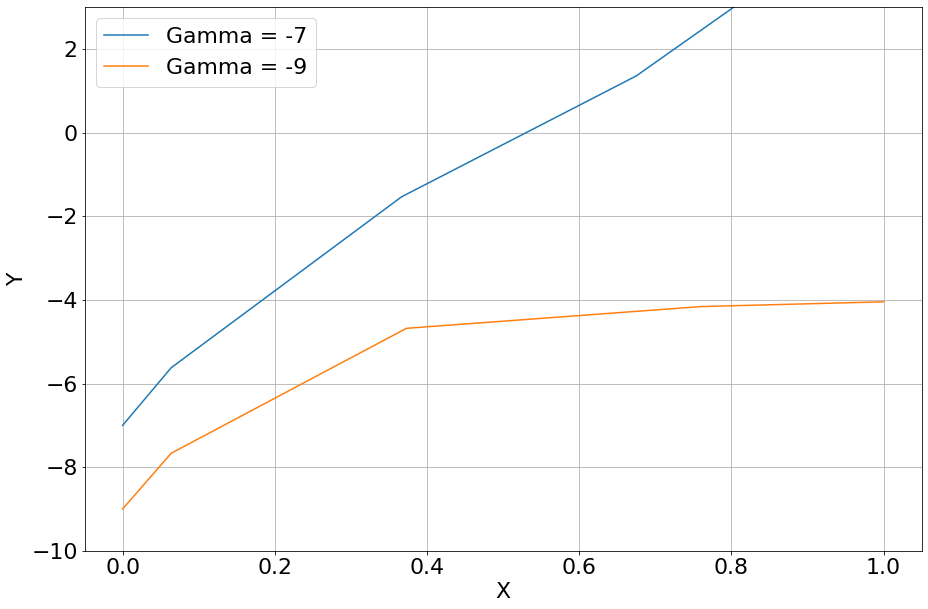

In [224]:
print(F(-7))
print(F(-9))
plt.ylim(-10,3)
plt.grid(True)
plt.legend(['Gamma = -7', 'Gamma = -9'])
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
# We can see in the graph above that one is below 0 and the other is above 0 confirming
# there is a root between -7 and -9 by the intermediate value theorem

Using ``np.vectorize`` vectorize the function ``F`` and compute the $F(\gamma)$ for 50 values of $\gamma$ between -7 and -9. This will make a plot with 50 curves. Label the axes of the plot with $x$ and $y_\gamma(x)$ and use a grid.

Text(0, 0.5, '$y_\\gamma(x)$')

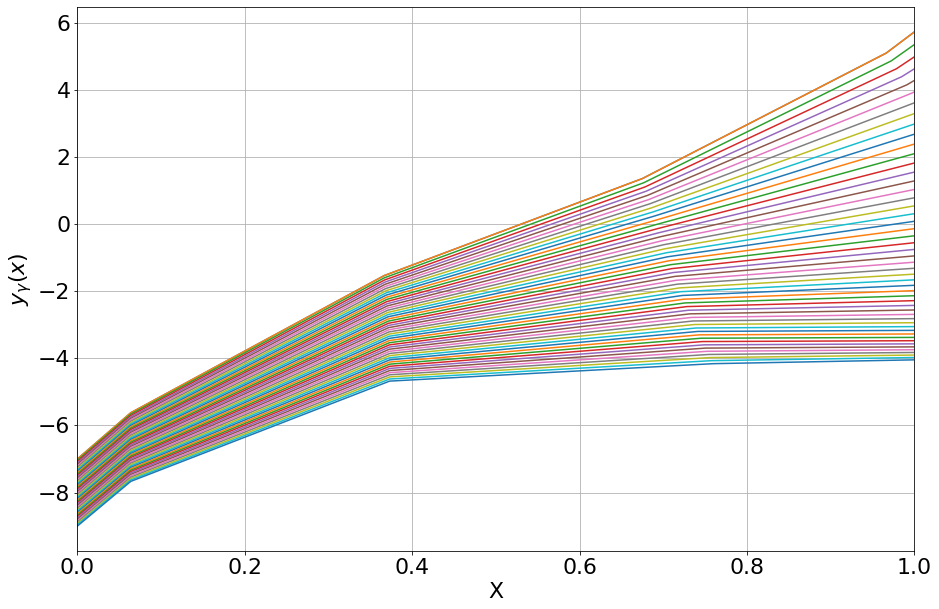

In [220]:
xval2 = np.linspace(-7,-9,50)
vF = np.vectorize(F)
yval2 = vF(xval2)

plt.xlim(0,1)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('$y_\gamma(x)$')

Using the result from the last question plot $F(\gamma)$. Use a grid and label your axes.

Text(0, 0.5, '$y_\\gamma(x)$')

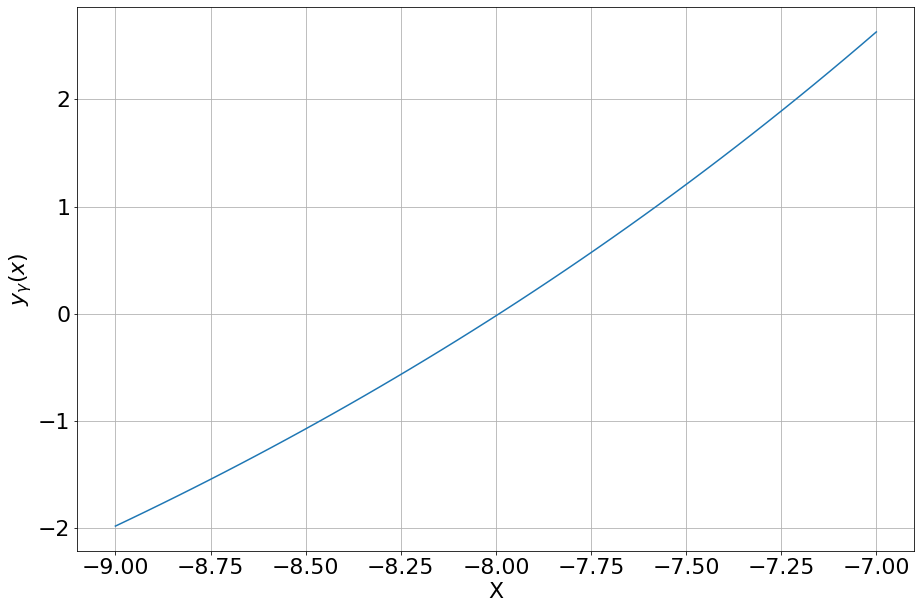

In [221]:
plt.plot(xval2, yval2)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('$y_\gamma(x)$')

Finally, using your ``FindRootSecant`` function to find the root of $F(\gamma)$

-7.991876868229051


Text(0, 0.5, 'Y')

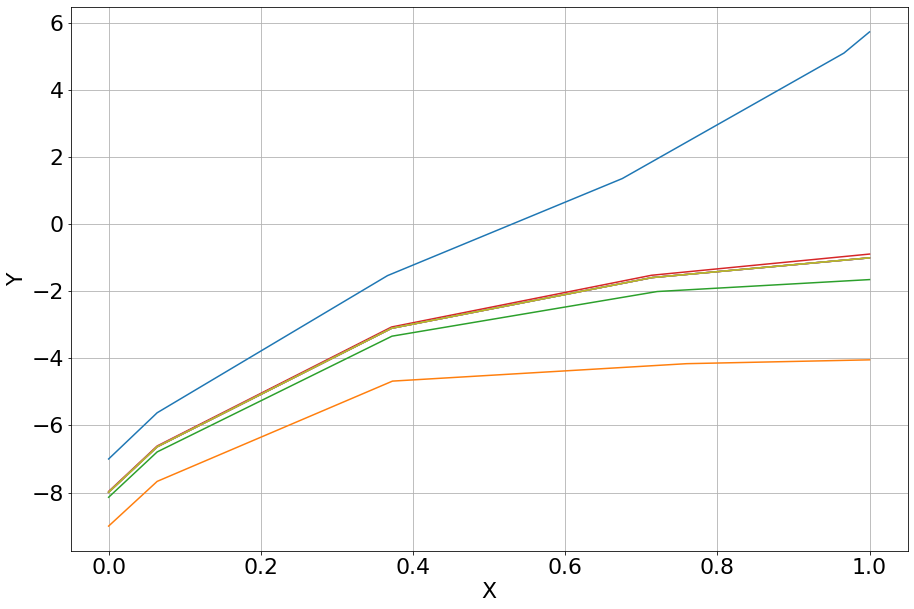

In [222]:
print(FindRootSecant(F, -7, -9, 1e-12))
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')

### Q5c: wrap it all up into a shooting method function

We now want to write a generic function with signature ``ShootingMethod(f, a, b, ya, yb, dya0, dya1, tol)`` that will work for any function and boundary values. A good way to do this is to define the function ``F`` within the ``ShootingMethod`` function. Complete the following skeleton of the function.

In [196]:
def ShootingMethod(f, a, b, ya, yb, dya0, dya1, tol):
    #Here adding in both our definitions from above into our shooting method
    def F2(dya):
        #changing the values of our arguemets to the arguements given in Shooting Method
        # in order for code to work
        solt=solve_ivp(f, [a,b], [ya,dya])
        plt.plot(solt.t, solt.y[-1])
        wgamb= solt.y[0][-1]
        #changed yb back here so it would work for any ODE
        return wgamb-yb
    def FindRootSecant2(f, dya0, dya1, tol):
        #defining our values from given arguments above in Q
        a = dya0
        b = dya1
        f1 =f(a)
        f2 =f(b)
        while (np.abs((f2)-(f1)) >= tol):
            xvalu = b - f2*(b - a)/(f2 - f1)
            a = b
            b = xvalu
            f1=f2
            f2=f(xvalu)
        return b
    #Now returing our our secant method in order to get our gamma out
    return FindRootSecant2(F2, dya0, dya1, tol)

As our differential equation is second order there are two solutions which satisify the boundary conditions. One solution has $\gamma \simeq -8$ and the other has $\gamma\simeq-36$. Use your ``ShootingMethod`` function to find the value of $\gamma$ for each solution.

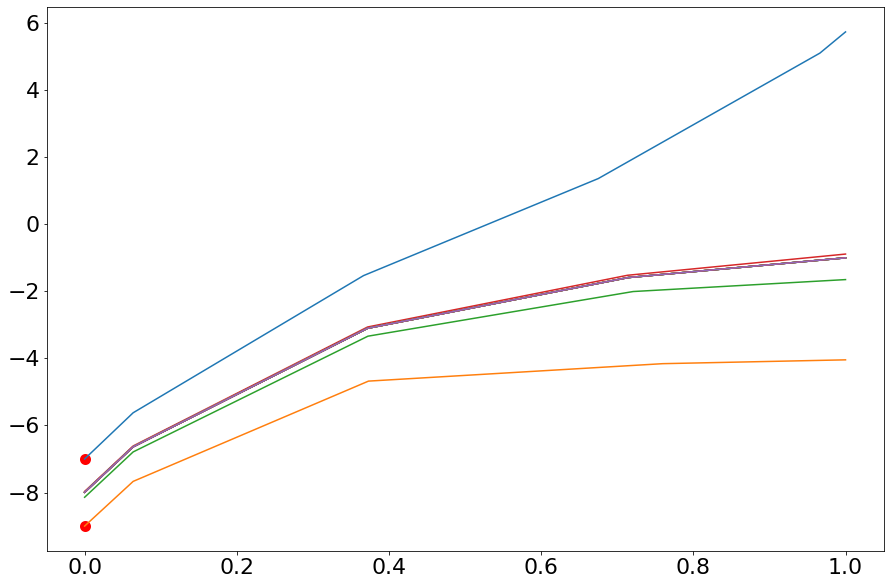

In [223]:
#Testing our method on gamma ~ -8 now
ShootingMethod(w, 0, 1, 4, 1, -7, -9, 1e-16)
#Also defining our arguements in terms of W ODE given above
plt.scatter(0,-7, color='red',linewidth=5)
#Here plotting our initial values to see them visually as out boundaries
plt.scatter(0,-9, color='red',linewidth=5)

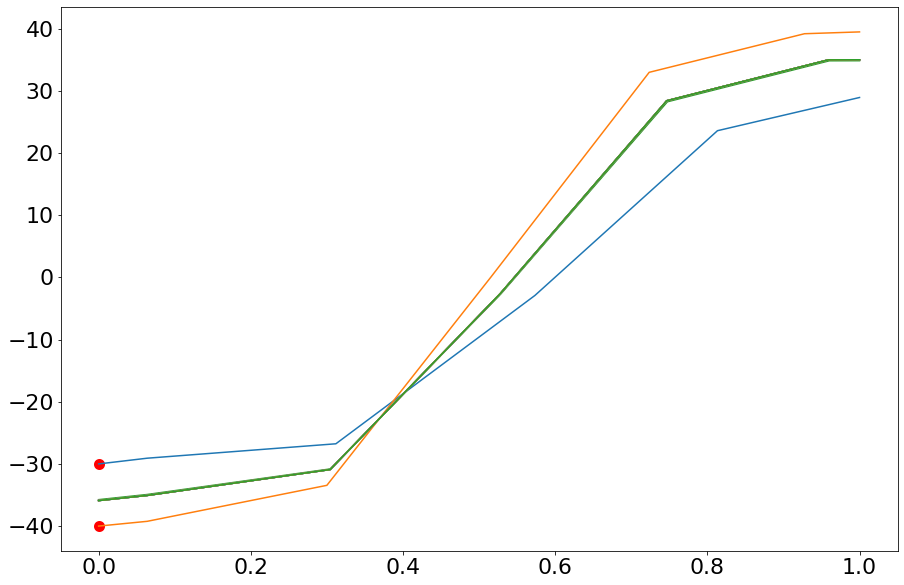

In [205]:
#Testing our method on gamma ~ -36 now
ShootingMethod(w, 0, 1, 4, 1, -30, -40, 1e-16)
plt.scatter(0,-30, color='red',linewidth=5)
#Here plotting our initial values to see them visually as out boundaries
plt.scatter(0,-40, color='red',linewidth=5)

### Q5: Bonus (worth one bonus mark but max marks remains at 30)

Instead of explicitly defining a function within a function we can use something called [Lambda functions](https://www.w3schools.com/python/python_lambda.asp). Look these up and write a function called ``ShootingMethodLambda`` that implements the shoot method using a Lambda Function.

Test your ``ShootingMethodLambda`` function agrees with the result of the ``ShootingMethod`` function

Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

Hand in your assignment via BrightSpace